## Start Coding

Let's start with our import of TensorFlow 

In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.9.2


The MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [2]:
(training_images, training_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

Calling load_data on this object will give you two sets of two lists, these will be the training and testing value


One of the first step in a machine learning problem needs to be the understanding of the data. What does these data look like? Let's print a training image, and a training label to see... Try also to experiment with different indices in the array. For example, also take a look at index 42... that should be a different boot than the one at index 0


3


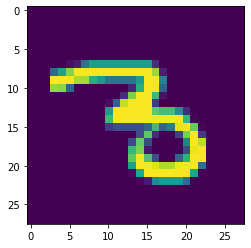

In [7]:
import matplotlib.pyplot as plt
plt.imshow(training_images[30])
print(training_labels[30])
#print(training_images[0])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [3]:
training_images = training_images / 255
test_images = test_images / 255

In [4]:
training_labels = keras.utils.to_categorical(training_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


In [12]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3,restore_best_weights=True)
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
history=model.fit(training_images, training_labels,validation_data=(test_images, test_labels), epochs=15, callbacks=[early_stopping])

Epoch 1/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0151 - accuracy: 0.9952 - val_loss: 0.1091 - val_accuracy: 0.9801
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0122 - accuracy: 0.9962 - val_loss: 0.1090 - val_accuracy: 0.9791
Epoch 3/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.1259 - val_accuracy: 0.9784
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0098 - accuracy: 0.9971 - val_loss: 0.1123 - val_accuracy: 0.9797


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


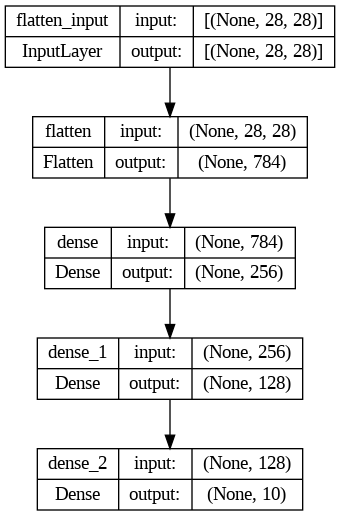

In [7]:
model.summary()
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.9098. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [64]:
model.evaluate(test_images, test_labels )
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 2s 6ms/step
[1.9483226e-16 3.4937191e-08 5.2725813e-10 2.7981792e-11 1.0523448e-09
 3.8622607e-13 4.2115924e-20 1.0000000e+00 8.7777138e-12 3.9727293e-08]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
import matplotlib.pyplot as plt
def summarize_diagnostics(history):
  acc = history.history['accuracy']
  loss = history.history['loss']
  val_acc = history.history['val_accuracy']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(acc, 'r', label='Training accuracy')
  plt.plot(val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)
  plt.figure()
  plt.show()

  plt.plot(loss, 'r', label='Training Loss function')
  plt.plot(val_loss, 'b', label='Validation Loss function')
  plt.title('Training and validation loss function')
  plt.legend(loc=0)
  plt.figure()
  plt.show()
summarize_diagnostics(history)

In [11]:
import numpy as np
import seaborn as sn
# Make predictions on the test data
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_labels, axis=1)

313/313 [==============================] - 1s 3ms/step


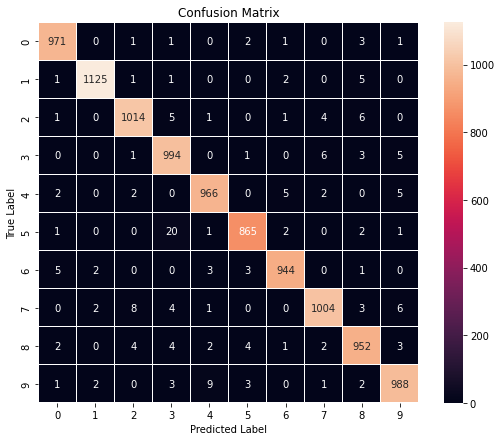

In [12]:
confusion_matrix = tf.math.confusion_matrix(test_labels, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

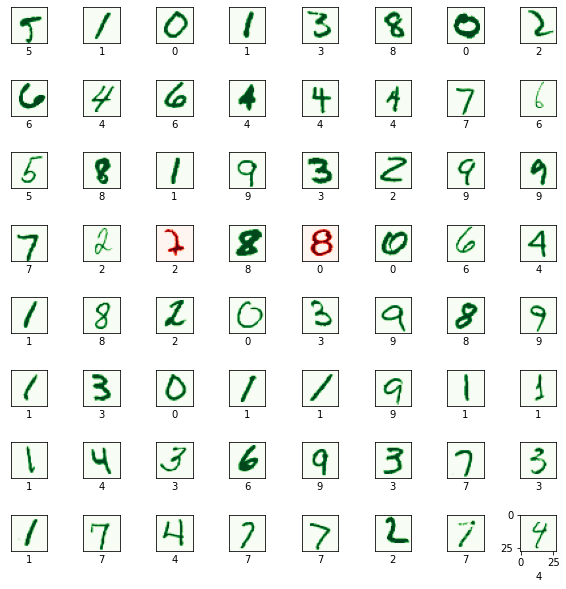

In [19]:
import math
numbers_to_display = 64
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10, 10))
random_num=np.random.randint(0,10000, size=numbers_to_display)
for plot_index in range(numbers_to_display):    
    predicted_label = predictions[random_num[plot_index]]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == test_labels[random_num[plot_index]] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(test_images[random_num[plot_index]].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()